<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week8/Day1/W8D1_XC_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn import metrics


# 🌟 Exercise 1 : Understanding The Problem And Data Collection

In [62]:
df = pd.read_csv('diabetes_prediction_dataset.csv')


In [63]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [65]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [66]:
diabets=df.groupby('diabetes')['diabetes'].count()
diabets

diabetes
0    91500
1     8500
Name: diabetes, dtype: int64

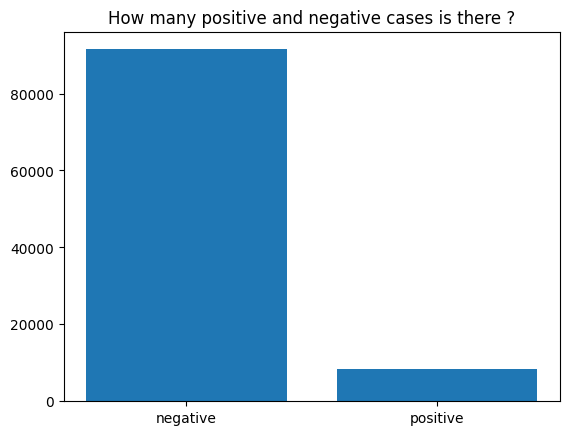

In [67]:
plt.bar(['negative', 'positive'], diabets)
plt.title('How many positive and negative cases is there ?')
plt.show()

In [68]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [69]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [70]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [71]:
df_dummies = pd.get_dummies(df, columns=['smoking_history'])
df_dummies.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [72]:
columns = df_dummies.drop(columns='diabetes').columns
target = ['diabetes']

data_features = df_dummies[columns]
data_target = df_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print('X_train =', len(X_train))
print('X_test =', len(X_test))

X_train = 70000
X_test = 30000


# Exercise 2 : Model Picking And Standardization

The dataset you provided contains a mix of categorical and numerical features and  related to predicting a binary outcome for diabetes (0 or 1). So we can select Logistic Regression model

In [73]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Now, X_scaled is a NumPy array with standardized values. You can convert it back to a DataFrame if needed:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_train.columns)


In [74]:
X_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,-0.842855,-1.106470,-0.284513,-0.205412,0.319294,0.441212,-1.177359,-0.746353,-0.320158,-0.204200,-0.320646,1.359099,-0.263199
1,1.185050,-1.416714,-0.284513,-0.205412,-0.217990,-1.892137,-1.177359,1.339848,-0.320158,-0.204200,-0.320646,-0.735782,-0.263199
2,-0.842855,-0.796226,-0.284513,-0.205412,1.032662,0.907882,-0.193501,-0.746353,-0.320158,4.897158,-0.320646,-0.735782,-0.263199
3,-0.842855,0.267467,-0.284513,-0.205412,0.051404,-1.892137,-0.291887,1.339848,-0.320158,-0.204200,-0.320646,-0.735782,-0.263199
4,1.185050,0.400429,-0.284513,-0.205412,0.274144,-0.492127,0.175446,-0.746353,3.123458,-0.204200,-0.320646,-0.735782,-0.263199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.842855,-0.264379,-0.284513,-0.205412,-0.001271,0.254544,0.495200,-0.746353,-0.320158,-0.204200,-0.320646,1.359099,-0.263199
69996,-0.842855,-1.062150,-0.284513,-0.205412,-1.250418,-1.892137,-0.291887,-0.746353,-0.320158,-0.204200,-0.320646,1.359099,-0.263199
69997,1.185050,1.685725,3.514780,-0.205412,0.155249,0.254544,-1.177359,-0.746353,-0.320158,-0.204200,3.118706,-0.735782,-0.263199
69998,-0.842855,0.400429,3.514780,-0.205412,4.542315,0.627880,-0.291887,-0.746353,-0.320158,-0.204200,3.118706,-0.735782,-0.263199


# 🌟 Exercise 3 : Model Training

In [75]:
model = LogisticRegression()

model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

# Exercise 4 : Evaluation Metrics, Exercise 5 : Visualizing The Performance Of Our Model

In [76]:


accuracy = round(accuracy_score(y_test, pred), 2)
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
precision = round(precision_score(y_test, pred),2)

print("Accuracy for Logistic Regression Model 1 : {accuracy}".format(accuracy = accuracy))
print("Precision for Logistic Regression Model 1 : {precision}".format(precision = precision))
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Accuracy for Logistic Regression Model 1 : 0.96
Precision for Logistic Regression Model 1 : 0.88
Sensitivity/Recall for Logistic Regression Model 1 : 0.63
F1 Score for Logistic Regression Model 1 : 0.74


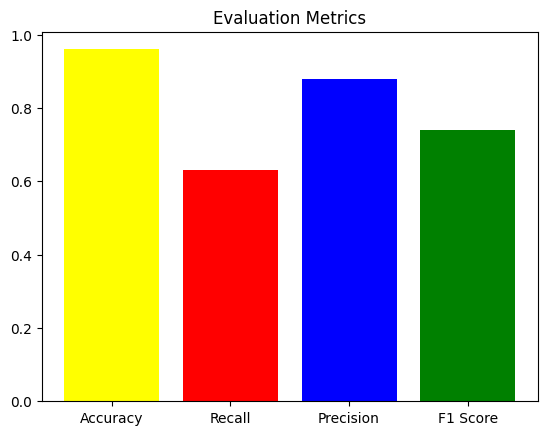

In [77]:
metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
metrics_values = [accuracy, recall_score, precision, f1_score]

plt.bar(metrics_names, metrics_values, color = ['yellow','red', 'blue','green'])
plt.title('Evaluation Metrics')
plt.show()

Model accuracy is very high, but this might not mean much because many people in our data do not have diabetes. Its precision is good when it predicts diabetes, but recall is  just 0.62. This means it's only okay at correctly identifying people with diabetes. For health, it's important to have a better recall.

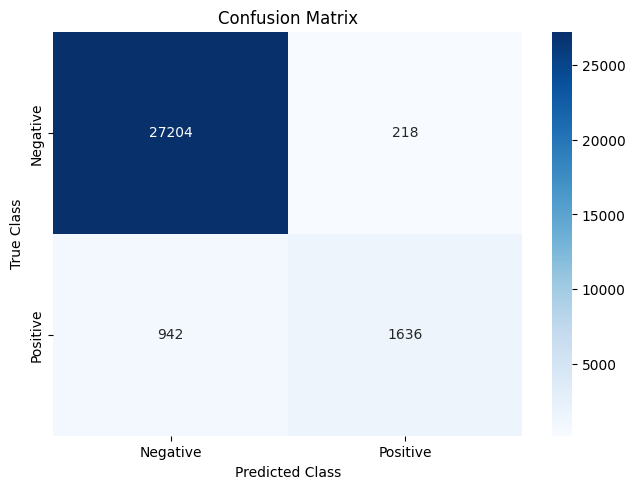

In [78]:


class_names = ['Negative', 'Positive']
matrix = confusion_matrix(y_test, pred)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Exercise 6 : ROC Curve

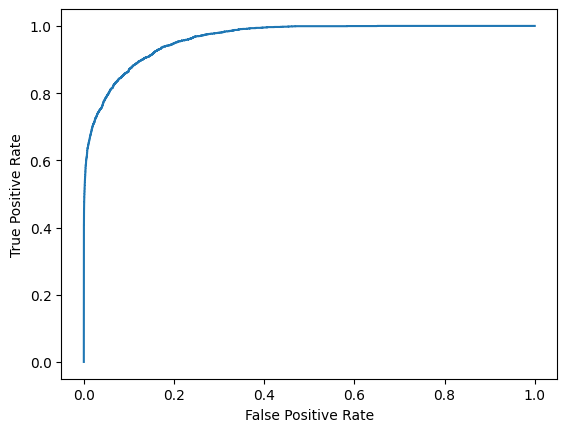

In [79]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()